In [1]:
import sys
import os

sys.path.append(os.path.abspath('..'))

In [2]:
import networkx as nx

from Classes.BiasedInfluenceGraph import *
from Classes.WordGenerator import *

# Linear functions

$\forall i,j : \beta_{ij}(x) = \alpha x$

Where $\alpha \in (0,1)$

Update function: $B_{t+1}[j] = B_{t}[j] + \alpha (B_{t}[i] - B_{t}[j]) I_{ij}$

In [3]:
alpha = 0.75

def lin(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return alpha * x

True


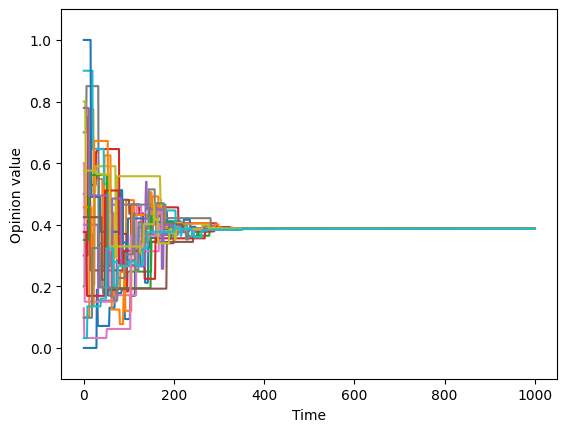

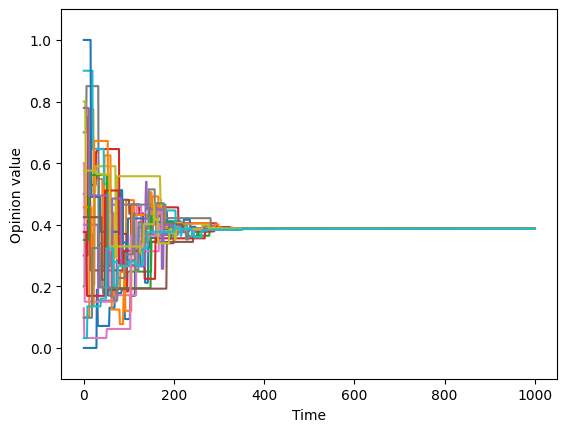

In [4]:
# Fig 1c. Random Erdos-Renyi graph
n = 20
p = 0.4
B0 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=lambda g, e: 1,bias_fn=lin)

word_len = 50*n
w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution()

With different value of $\alpha$ for each pair $i,j$

In [5]:
def scaled_difference(a, b):
    """
    Retorna la diferencia entre `a` y `b` multiplicada por un factor de escala único.
    El factor de escala es determinístico y depende de la pareja `(a, b)`.
    """
    scale_factor = (hash((a, b)) % 1000) / 1000  # Genera un valor entre 0 y 1 basado en el hash
    return (a - b) * scale_factor

def lin2(G,e):
    a = G.opinion[e[0]]
    b = G.opinion[e[1]]
    return scaled_difference(a, b)


True


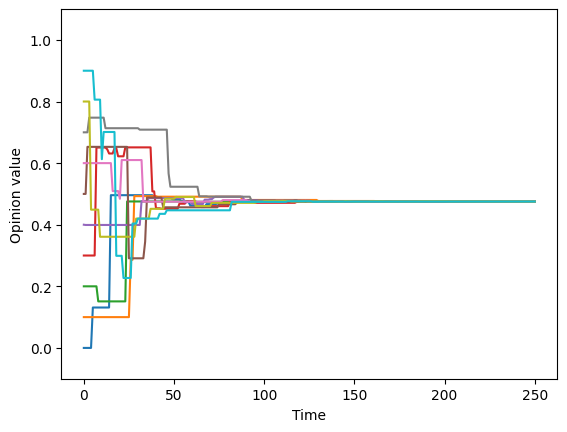

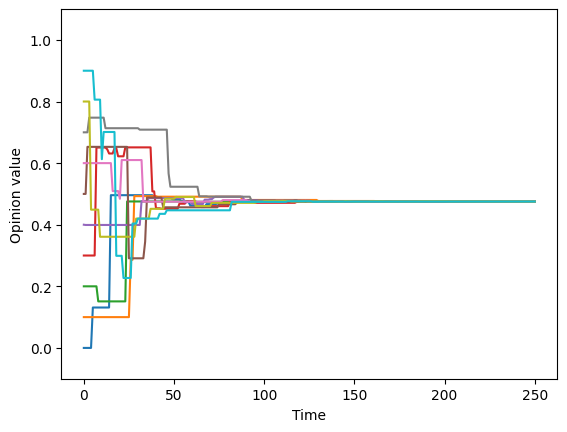

In [25]:
# Fig 1c. Random Erdos-Renyi graph
n = 10
p = 0.4
B0 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=lambda g, e: 1,bias_fn=lin2)

word_len = 25*n
w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution()

## Conf Function

Confirmation bias function:
$conf(x) = \frac{x(1+ \delta - |x|)}{1+\delta}$

In [28]:
def conf(G, e):
    delta = 0.1
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return x*(1 + delta - abs(x))/(1+delta)

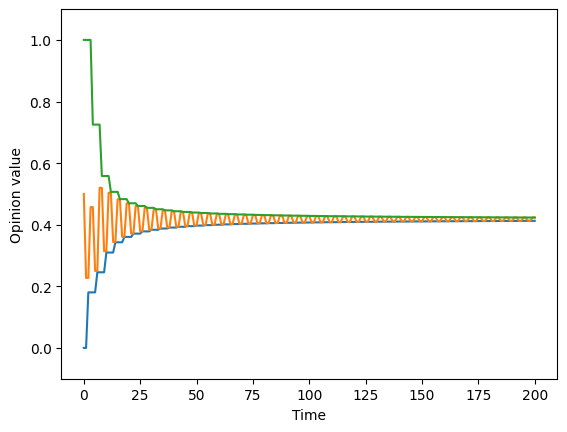

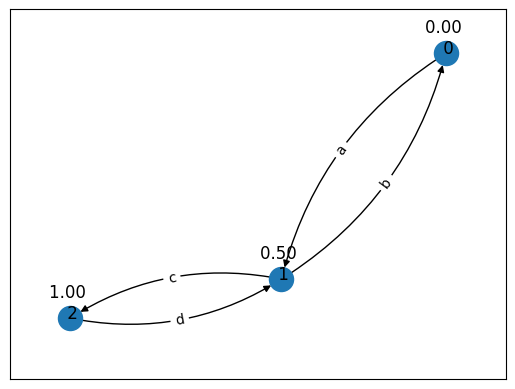

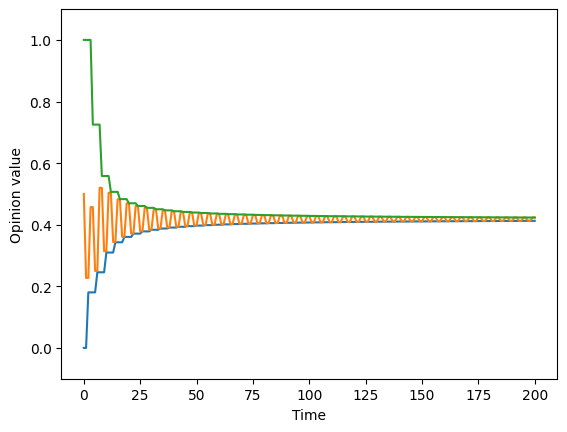

In [29]:
g = nx.DiGraph([(0,1),(1,0),(2,1),(1,2)])

puppet_influence = lambda g,e: 1

G = BiasedInfluenceGraph(4, ops=[0,0.5,1], G=g, influence_fn=puppet_influence, bias_fn=conf)
nodes = 3

G.draw()

w = "abdc"*50
G.execute_word(w)

G.plot_opinion_evolution()

True


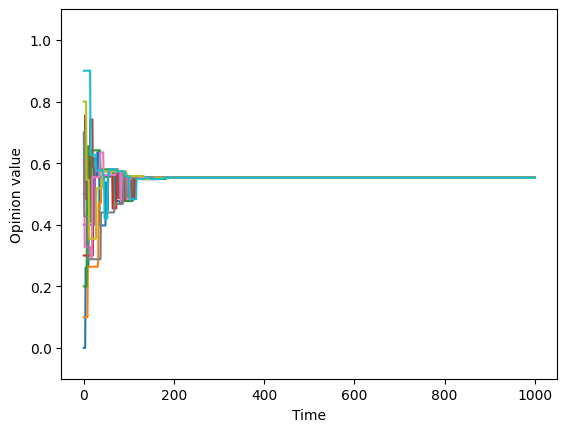

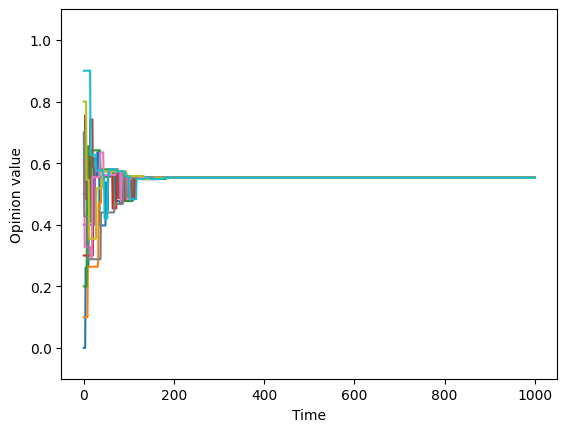

In [9]:
# Fig 1c. Random Erdos-Renyi graph
n = 10
p = 0.4
B0 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=lambda g, e: 1,bias_fn=conf)

word_len = 100*n
w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution()

## Other functions

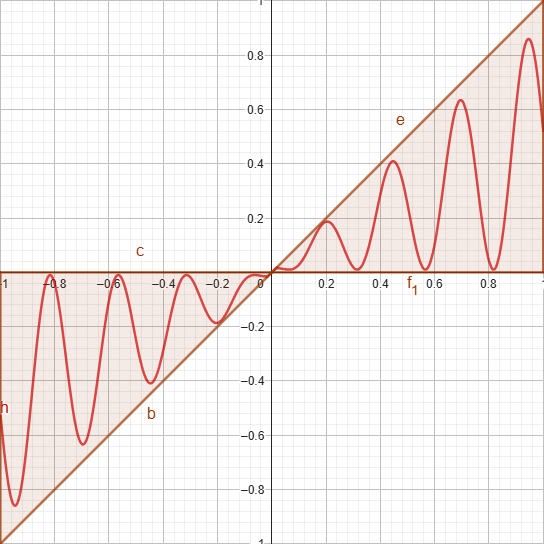

In [10]:
from IPython.display import Image, display

# Muestra la imagen guardada en la carpeta 'images'
display(Image(filename='../images/random_func.png'))

Using a function that increases and decreases in many points

In [11]:
import math

def random_func(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    if x >= -1 and x < -0.02:
        return (math.sin(25*x )*x + x)/2 * 0.9 - 0.01
    elif x >= -0.02 and x <= 0.02:
        return x*0.734259
    elif x <= 1 and x > 0.02:
        return (math.sin(25*x + math.pi)*x + x)/2 * 0.9 + 0.01  

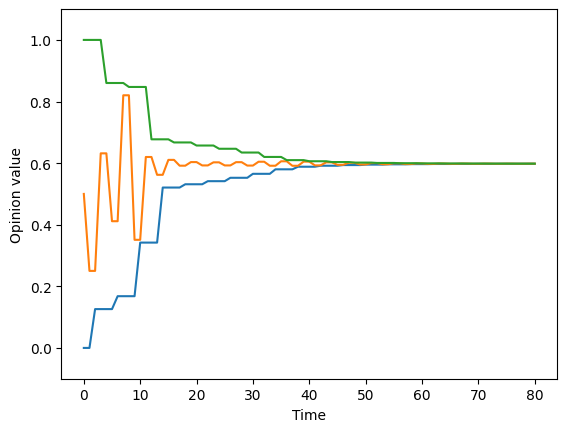

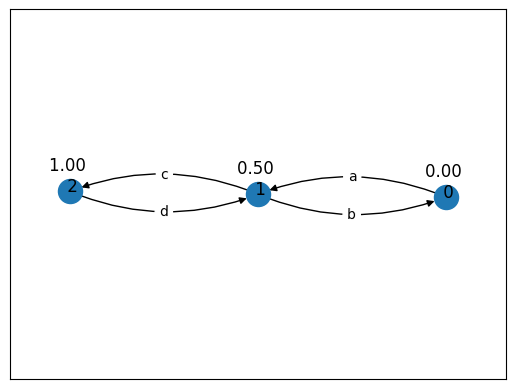

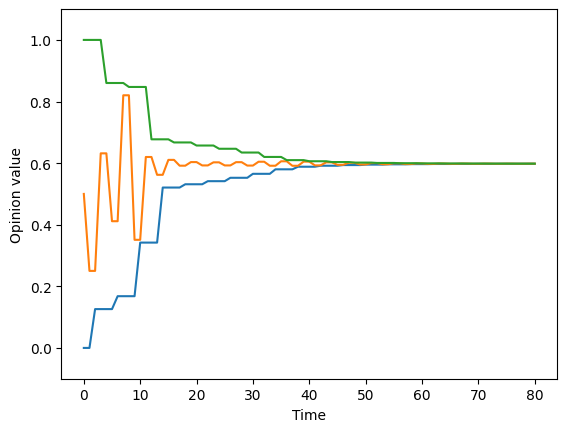

In [12]:
g = nx.DiGraph([(0,1),(1,0),(2,1),(1,2)])

puppet_influence = lambda g,e: 1

G = BiasedInfluenceGraph(4, ops=[0,0.5,1], G=g, influence_fn=puppet_influence, bias_fn=random_func)
nodes = 3

G.draw()

w = "abdc"*20
G.execute_word(w)

G.plot_opinion_evolution()

True


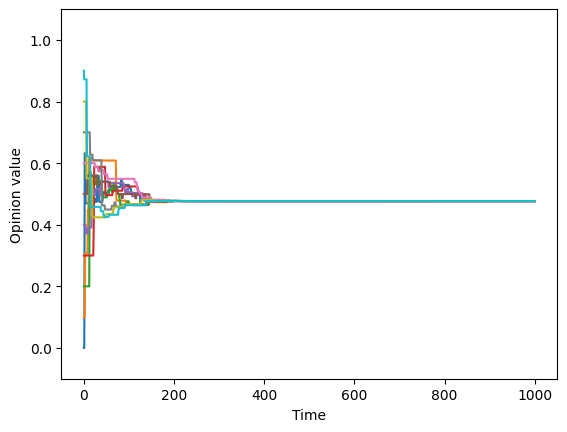

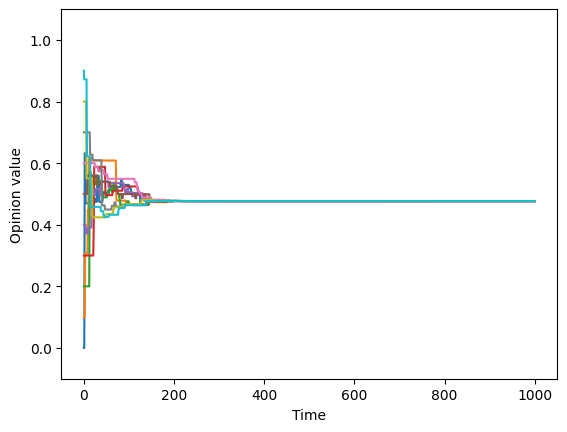

In [13]:
# Fig 1c. Random Erdos-Renyi graph
n = 10
p = 0.4
B0 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=lambda g, e: 1,bias_fn=random_func)

word_len = 100*n
w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution()

## Using different functions in R

In [14]:
import random

# Lista de funciones de sesgo disponibles
bias_functions = [lin2, conf, random_func]

# Diccionario para almacenar la función asignada a cada pareja
pair_function_map = {}

def get_random_bias_function_for_pair(e):
    if e not in pair_function_map:
        pair_function_map[e] = random.choice(bias_functions)
    return pair_function_map[e]

def random_pair_bias(G, e):
    func = get_random_bias_function_for_pair(e)
    return func(G, e)

True


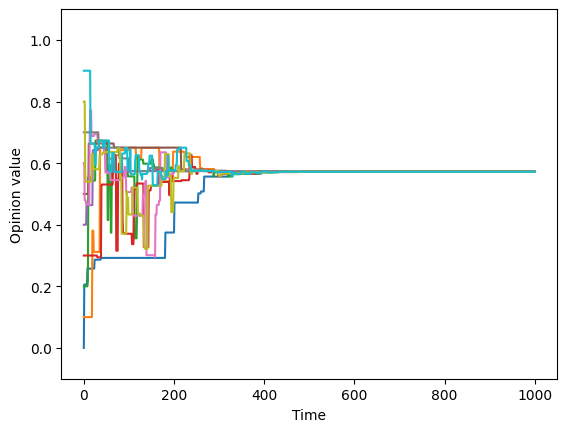

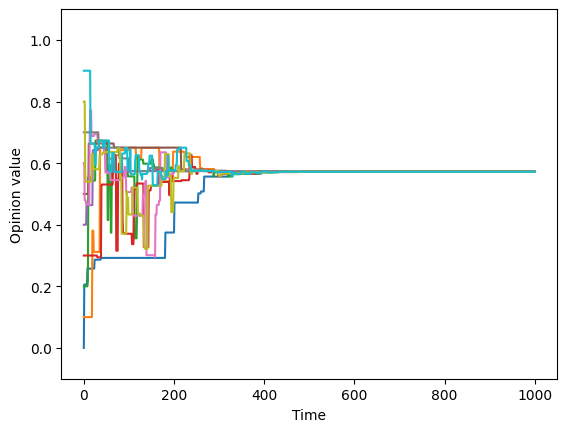

In [18]:
n = 10
p = 0.4
B0 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=lambda g, e: 1,bias_fn=random_pair_bias)

word_len = 100*n
w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution()

## Update function changing over time

In [16]:
def random_lin(G, e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    scale_factor = random.uniform(0.0001, 1)
    return scale_factor * x

def set_random_bias_function(G, e):
    return random.choice([lin2, conf, random_func, random_lin])(G,e)

True


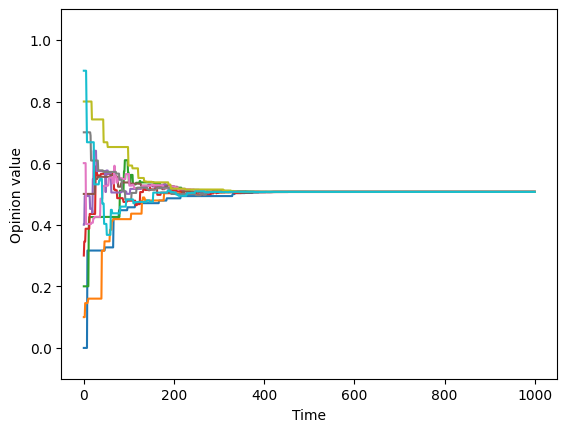

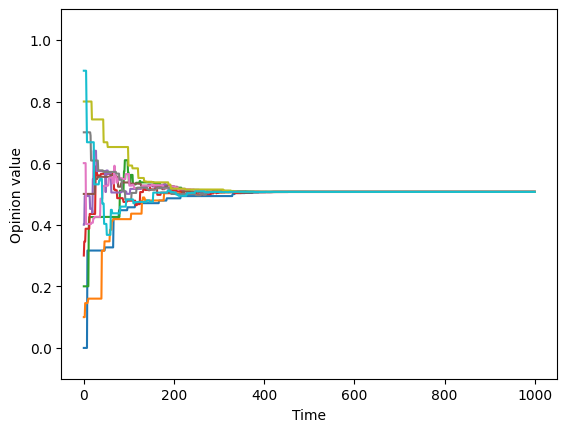

In [17]:
n = 10
p = 0.4
B0 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=lambda g, e: 0.5,bias_fn=set_random_bias_function)
word_len = 100*n
w = generate_random_word(G, word_len)

G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution()